Importing Neccesary Libraries

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options

Making Sure the Browser is Seamless

In [11]:
options = Options()
options.headless = True
driver = webdriver.Firefox(options=options)

The geckodriver version (0.33.0) detected in PATH at c:\Users\tvshe\Downloads\webdrivers\geckodriver-v0.33.0-win64\geckodriver.exe might not be compatible with the detected firefox version (129.0.0.2295); currently, geckodriver 0.35.0 is recommended for firefox 129.*, so it is advised to delete the driver in PATH and retry


Setting Up WebDriver and URLS for Scraping

In [12]:
URLS = []
count = int(input("How many stocks would you like data for?"))

for i in range(count):
    z = input("Enter the abberviation at the end of the yahoo finance URL: ")
    URLS.append("https://finance.yahoo.com/quote/"+z)
    

data = []

How many stocks would you like data for? 1
Enter the abberviation at the end of the yahoo finance URL:  NVDA


Iterating Through Each URL In Order to Find Data

In [13]:

for i in URLS:
    driver.get(i)
    try:
        stockNameElement = driver.find_element(By.XPATH,'/html/body/div[1]/main/section/section/section/article/section[1]/div[1]/div')
        stockPriceElement = driver.find_element(By.XPATH, '/html/body/div[1]/main/section/section/section/article/section[1]/div[2]/div[1]/section/div/section[1]/div[1]')
        stockNameText = stockNameElement.text
        stockPriceText = stockPriceElement.text
        stockPrice = stockPriceText.split()[0]
        stockPriceNumericalChange = stockPriceText.split()[1]
        stockPricePercentChange = stockPriceText.split()[2]
        x = [stockNameText,stockPrice,stockPriceNumericalChange,stockPricePercentChange]
        data.append(x)
    except Exception as e:
        print("You're url was not found")
driver.quit()
print(data)


[['NVIDIA Corporation (NVDA)\nFollow\nCompare', '98.91', '-5.34', '(-5.12%)']]


Turning Data into DataFrame and Cleaning Up in Order for Plot Usage

In [14]:
dataColumns = ["Company", "Price","Numerical_Change","Percentage_Change"]
df = pd.DataFrame(data,columns = dataColumns)
df["Price"] = pd.to_numeric(df["Price"])
clean_df = df.replace("\nFollow","",regex=True)
clean_df = clean_df.set_index("Company")
print(clean_df)

                                    Price Numerical_Change Percentage_Change
Company                                                                     
NVIDIA Corporation (NVDA)\nCompare  98.91            -5.34          (-5.12%)


Creating a Bar Graph Out of Scraped Data

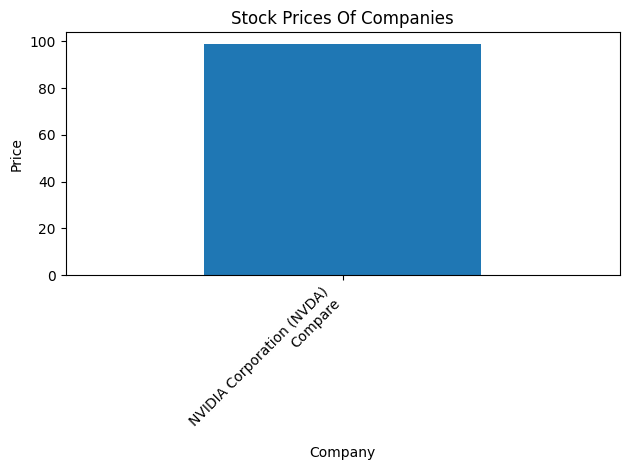

In [15]:

plot = clean_df['Price'].plot(kind = "bar", title="Stock Prices Of Companies",legend=False)
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()